Open price correlation: -0.02512038336008146
Close price correlation: 0.013495506386173863
Traditional Method Accuracy for Open Price:  93.68048428391226
Sentimental Method Accuracy for Open Price:  -12.22970736415865
Hybrid Method Accuracy for Open Price:  99.19423218501264

Traditional Method:
Coefficient: [[ 0.27642653  1.33178917 -0.46895922 -0.15487187]]
Root mean squared error = 0.0871
R-square = 0.9358
Sentimental Method Accuracy for Close Price:  93.5765832388271

 Sentiment method:
Coefficient: [[0.03457368]]
Root mean squared error = 0.3810
R-square = -0.0092
Sentimental Method Accuracy for Close Price:  -0.921517784206749

Hybrid Method:
Coefficient: [[ 0.20913227  1.12370996 -0.20594454 -0.1493651   0.07280414 -0.03877502]]
Hybrid Method Accuracy for Close price:  91.22399596377689
Root mean squared error = 0.1037
R-square = 0.9122


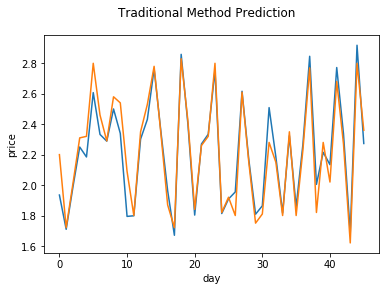

In [12]:
import pandas as pd
import copy
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score



result=pd.read_csv('../data/merged_AMD.csv')
print("Open price correlation:", result['Open'].corr(result['open_score']))
print("Close price correlation:", result['Close'].corr(result['close_score']))

df=copy.deepcopy(result)

df = df[['Open',  'Close', 'High',  'Low',  'open_score', 'close_score']]
forecast_col = ['Open',  'High',  'Low',  'Close']
df.fillna(value=-99999, inplace=True)

# forecast_out basically the days ka gap u want to set
forecast = 1

df['ForecastOpen'] = df[forecast_col[0]].shift(-forecast)
df['ForecastClose'] = df[forecast_col[3]].shift(-forecast)

# temporary copy
data=copy.deepcopy(df)

# tradition open price
X = np.array(df.drop(['ForecastOpen', 'ForecastClose','open_score','close_score'], 1))
X = X[:-forecast]
# print(X)
df.dropna(inplace=True)

y = np.array(df[['ForecastOpen']])
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print("Traditional Method Accuracy for Open Price: ", confidence * 100.0)

# sentimental open price
df=copy.deepcopy(data)
X = np.array(df[['open_score']])
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastOpen']])

# print(X)
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)*1
print("Sentimental Method Accuracy for Open Price: ", confidence * 100.0)


# hybrid open price
df=copy.deepcopy(data)
X = np.array(df.drop(['ForecastOpen', 'ForecastClose'], 1))
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastOpen']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
print("Hybrid Method Accuracy for Open Price: ", confidence * 100.0)

#traditional close price
df=copy.deepcopy(data)
X = np.array(df.drop(['ForecastOpen', 'ForecastClose','open_score','close_score'], 1))
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastClose']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
reg = clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

confidence = clf.score(X_test, y_test)
print("\nTraditional Method:")
print("Coefficient:", reg.coef_)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))
print("R-square = %.4f" % r2_score(y_test, prediction))
print("Sentimental Method Accuracy for Close Price: ", confidence * 100.0)




# sentimental close price
df=copy.deepcopy(data)
X = np.array(df[['close_score']])
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastClose']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
reg = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
confidence = clf.score(X_test, y_test)*1

print("\n Sentiment method:")
print("Coefficient:", reg.coef_)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))
print("R-square = %.4f" % r2_score(y_test, prediction))
print("Sentimental Method Accuracy for Close Price: ", confidence * 100.0)

#hybrid close price
df=copy.deepcopy(data)
X = np.array(df.drop(['ForecastOpen', 'ForecastClose'], 1))
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastClose']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
reg = clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

prediction = clf.predict(X_test)

print("\nHybrid Method:")
print("Coefficient:", reg.coef_)
print ('Hybrid Method Accuracy for Close price: ', confidence*100)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))
print("R-square = %.4f" % r2_score(y_test, prediction))
result = prediction.ravel() 



predictions_dataframe1 = pd.DataFrame(data=prediction[0:], columns=['Predicted Price'])
a = plt.plot(predictions_dataframe1,  label="test1")
plt.plot(pd.DataFrame(y_test[0:]) )
plt.suptitle('Traditional Method Prediction')
plt.xlabel('day')
plt.ylabel("price")
plt.show()


# predictions_dataframe1.plot(color='orange')
# pd.DataFrame(y_test[0:]).plot.line(color='green')

# print(predictions_dataframe1.shape)
# print(pd.DataFrame(y_test[0:]).shape)





